## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

office_df = pd.read_csv('datasets/office_episodes.csv')
office_df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [38]:
office_df.info()
# We can see a lot of missing values for guest_stars while the rest of the predictors don't have any missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


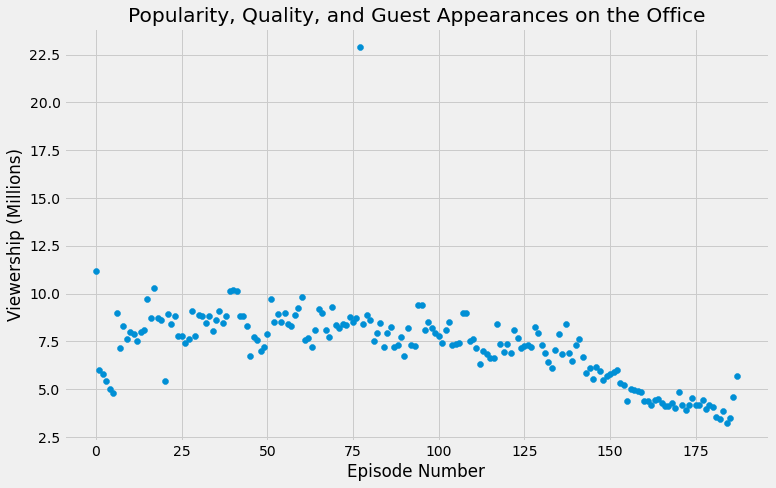

In [39]:
fig = plt.figure()
plt.scatter(x = office_df.episode_number, y = office_df.viewership_mil)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()
# We see one outlier on the top
# We see popularity gets lower as season progresses

We want to have a color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
Ratings < 0.25 are colored "red"
Ratings >= 0.25 and < 0.50 are colored "orange"
Ratings >= 0.50 and < 0.75 are colored "lightgreen"
Ratings >= 0.75 are colored "darkgreen"

In [40]:
cols = [];

#for ind, row in office_df.iterrows(): #picks us index and row
#    print(row['episode_title'])
    # as you can see we get each row's title, but we are concerned with rating
    
for ind, row in office_df.iterrows(): 
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')
    # This will create a list of colors for cols that is created on top

cols[:10] # We are just seeing a small sample

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen']

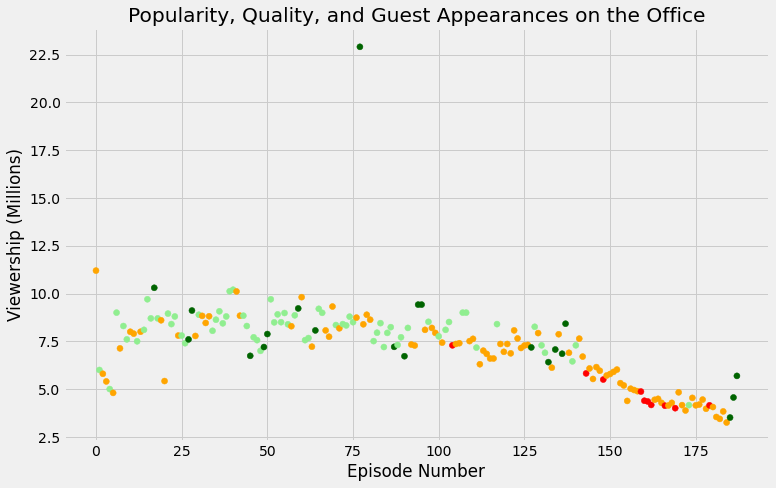

In [41]:
fig = plt.figure()
plt.scatter(x = office_df.episode_number, 
            y = office_df.viewership_mil,
            c = cols)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

From this visualization, we can see that the first few season had mid rating, and then it started to decline, and the last season got a good rating as we can see dark green colors on the end

## We want to crate a sizing system, such that episodes with guest appearances have a marker size (blob size) of 250 and episodes without are sized 30

In [42]:
sizes = []
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(30)
    else:
        sizes.append(250)
sizes[:10]

[30, 30, 30, 30, 30, 250, 30, 30, 250, 250]

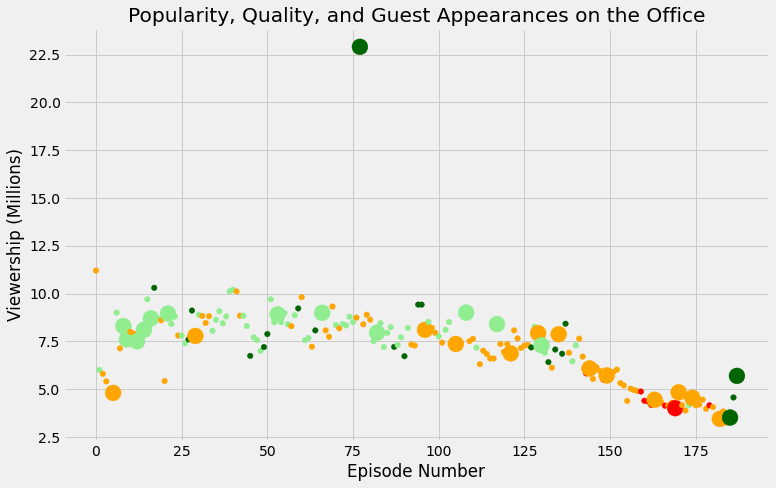

In [43]:
fig = plt.figure()
plt.scatter(x = office_df.episode_number, 
            y = office_df.viewership_mil,
            c = cols,
            s = sizes)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

# New trick that can be useful

In [44]:
# Notice how pandas doesn't know that release date is actually a date, but treats as object
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


Text(0, 0.5, 'Viewership (Millions)')

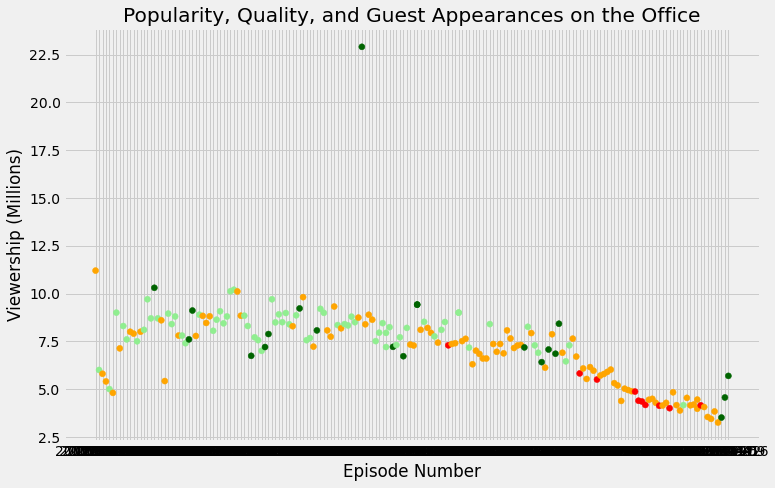

In [45]:
fig = plt.figure()
plt.scatter(x = office_df.release_date, 
            y = office_df.viewership_mil,
            c = cols)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
#If you see, the bottom axis is a bunch of gibberish which pandas doesn't know how to handle

To fix the bottom part, we can do is define release date as datetype, or later change it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

Text(0, 0.5, 'Viewership (Millions)')

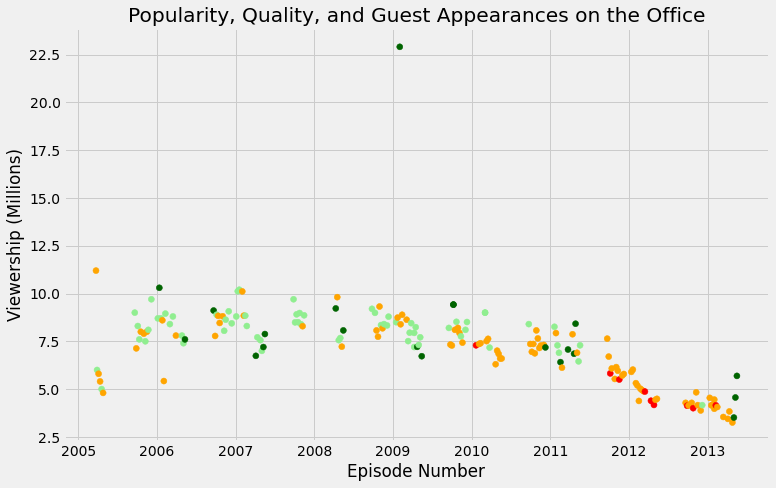

In [46]:
office_df = pd.read_csv('datasets/office_episodes.csv', parse_dates = ['release_date'])
office_df.info() #its converted to datetime
plt.scatter(x = office_df.release_date, 
            y = office_df.viewership_mil,
            c = cols)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

# Since we used parse date, we can see the date at the bottom properly

In [47]:
# Lets try adding two variables
office_df['colors'] = cols
office_df['sizes'] = sizes
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
 14  colors          188 non-null    object        
 15  sizes 

In [48]:
# Lets also create a guest and non guest dataframe
# We will put a star on the guest, and circle on the non guest
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

Text(0, 0.5, 'Viewership (Millions)')

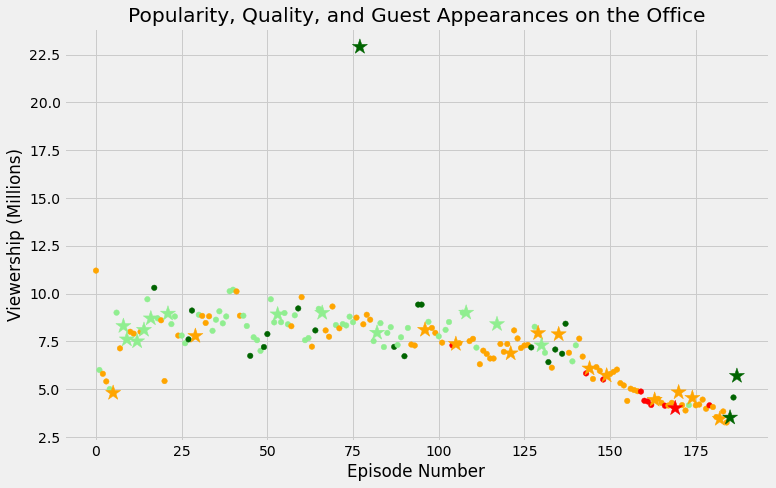

In [49]:
plt.style.use('fivethirtyeight')

plt.scatter(x = non_guest_df['episode_number'], 
            y = non_guest_df.viewership_mil,
            c = non_guest_df['colors'],
            s = non_guest_df['sizes'])

plt.scatter(x = guest_df['episode_number'], 
            y = guest_df.viewership_mil,
            c = guest_df['colors'],
            s = guest_df['sizes'],
            marker = '*')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

## Provide the name of one of the guest stars, who was in the most watched Office episode

In [50]:
#One way we can do this is by:
office_df[office_df['viewership_mil'] > 20]['guest_stars']
# The top code will first filter out shows with viewership that are more than 20 mil
# and then filter out the guest stars from that

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [51]:
# If we want the top most, we can use max
office_df[office_df['viewership_mil'] == office_df['viewership_mil'].max()]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [52]:
top_star = 'Jack Black'

As we can see, the guest speaker who was in the most watched Office episode was Jack Black, Cloris Leachman, and Jessica Alba